In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn.cluster import KMeans
from pathlib import Path

In [2]:
df = pd.read_csv('CollegeRookieStatLog2.csv')
df1 = df.drop(['G','Pos', 'Year','School','GS'], axis=1)
df1 = df1.set_index('Name')
df1.head()

,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,...,PTS,SOS,Age,MP_NBA,PER_NBA,3PAr_NBA,STLrate_NBA,OBPM_NBA,DBPM_NBA,BPM_NBA
Name,,,,,,,,,,,,,,,,,,,,,
Carmelo Anthony,36.4,7.9,17.5,0.453,6.3,12.7,0.496,1.6,4.7,0.337,...,22.2,9.02,19,2995,17.6,0.146,1.7,1.2,-1.2,0.1
Marcus Banks,34.3,6.0,12.2,0.495,5.0,9.1,0.551,1.0,3.1,0.330,...,18.1,4.77,22,1385,11.0,0.195,3.3,-2.8,-0.5,-3.3
Matt Barnes,22.6,3.3,7.1,0.469,2.8,5.5,0.514,0.5,1.6,0.314,...,8.8,10.45,23,724,10.6,0.094,2.0,-1.4,-0.2,-1.6
Troy Bell,35.7,6.2,14.7,0.424,3.8,8.1,0.467,2.5,6.6,0.372,...,21.6,5.85,23,34,-4.5,0.222,1.5,-10.4,-3.9,-14.4
Steve Blake,31.3,2.7,6.8,0.401,1.4,3.3,0.423,1.3,3.5,0.381,...,8.3,9.34,23,1392,10.9,0.496,2.1,-1.4,-2.6,-4.0


In [3]:

df1.dropna()
df2 = df1.copy(deep=True)
cols = df2.columns
sc2 = StandardScaler()
for col in cols:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')
    df2[[col]] = sc2.fit_transform(df2[[col]])
df2.head()
df2.dtypes
df2.to_csv('df1.csv')

AxesSubplot(0.127273,0.125;0.617727x0.755)


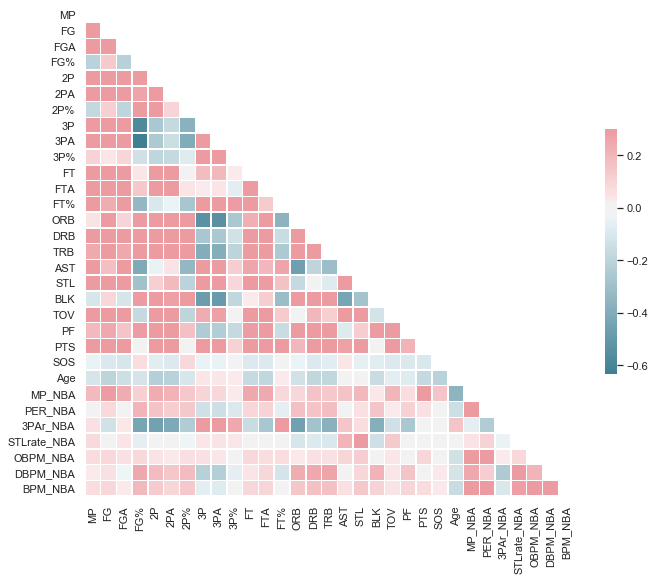

In [4]:
sns.set(style="white")

d = df2

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}))

In [5]:
def plot_embedding(X, y, title=None, num=10):
    x_min = np.min(X, 0)
    x_max = np.max(X, 0)
    X = (X-x_min)/(x_max-x_min)
    
    plt.figure(figsize=(18, 9))
    plt.scatter(X[:,0], X[:,1], color=plt.cm.Set1(y/num))
    
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()

In [6]:
def plot_embedding3d(X, y, title=None):
    x_min = np.min(X, 0)
    x_max = np.max(X, 0)
    X = (X-x_min)/(x_max-x_min)
    
    plt.figure()
    
    ax = Axes3D(plt.figure(), rect=[0, 0, .95, 1], elev=48, azim=134)
    ax.scatter(X[:,0], X[:,1], color=plt.cm.Set1(y/10.))
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    if title is not None:
        plt.title(title)
    plt.show()

In [7]:
df3 = df2.drop(['MP','MP_NBA','PER_NBA', '3PAr_NBA', 'OBPM_NBA', 'DBPM_NBA', 'BPM_NBA', 'STLrate_NBA'], axis=1)
df3.head()

,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,Age
Name,,,,,,,,,,,,,,,,,,,,,
Carmelo Anthony,2.707237,2.909425,-0.347544,2.281605,2.612172,-0.298869,0.821227,1.015495,0.046004,1.726583,...,2.444185,2.264333,-0.043648,1.103427,0.289263,0.286893,0.008292,2.527153,0.746366,-1.703368
Marcus Banks,1.252536,1.027025,0.401985,1.265161,1.073308,0.761808,0.026329,0.194578,-0.012172,1.896182,...,-0.770658,-0.879139,1.348884,2.942904,-0.732208,2.298962,1.487404,1.461991,-0.385038,-0.128268
Matt Barnes,-0.814672,-0.784341,-0.062009,-0.454975,-0.465555,0.048261,-0.636086,-0.575031,-0.145144,-0.902202,...,0.729602,-0.175376,-0.176270,-0.122890,-0.440359,-0.000546,0.008292,-0.954107,1.127050,0.396766
Troy Bell,1.405662,1.914950,-0.865076,0.326905,0.645846,-0.858136,2.013573,1.990333,0.336880,3.252974,...,-0.842099,-0.550716,0.818396,2.329745,-0.586284,1.292927,0.219593,2.371275,-0.097528,0.396766
Steve Blake,-1.274051,-0.890892,-1.275532,-1.549607,-1.405971,-1.706677,0.423778,0.399807,0.411677,-1.071802,...,-0.627776,-0.832221,3.139282,1.307813,-0.586284,1.867804,-0.203010,-1.084005,0.831554,0.396766


In [8]:

subSpace = TSNE().fit_transform(df3.values)

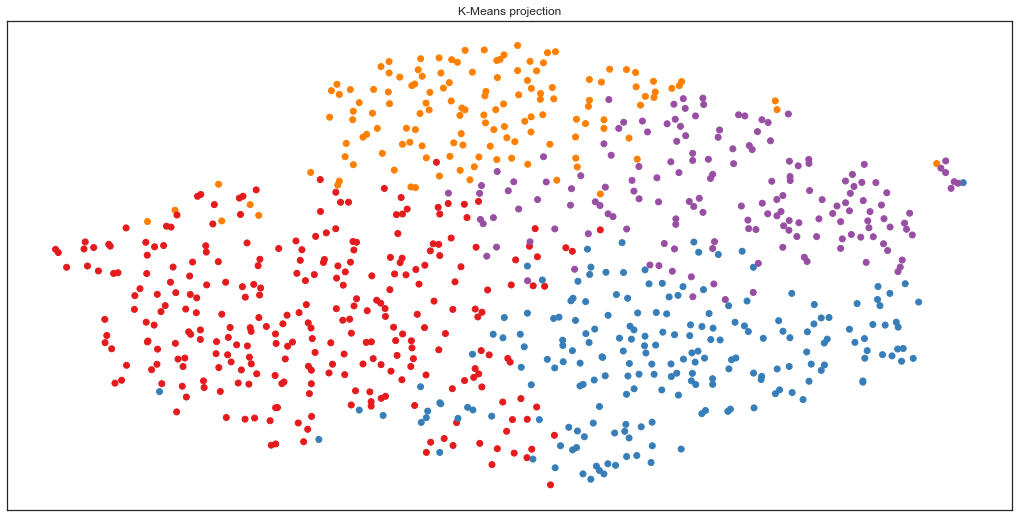

In [9]:
cluster = KMeans(n_clusters=4, max_iter= 10000, n_init=100).fit(df3.values)
plot_embedding(subSpace, cluster.labels_, 'K-Means projection',6)

In [15]:
df4 = df1.copy(deep=True)
df4['label'] = cluster.labels_ 
df4.head(100)

,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,...,SOS,Age,MP_NBA,PER_NBA,3PAr_NBA,STLrate_NBA,OBPM_NBA,DBPM_NBA,BPM_NBA,label
Name,,,,,,,,,,,,,,,,,,,,,
Carmelo Anthony,36.4,7.9,17.5,0.453,6.3,12.7,0.496,1.6,4.7,0.337,...,9.02,19,2995,17.6,0.146,1.7,1.2,-1.2,0.1,3
Marcus Banks,34.3,6.0,12.2,0.495,5.0,9.1,0.551,1.0,3.1,0.330,...,4.77,22,1385,11.0,0.195,3.3,-2.8,-0.5,-3.3,0
Matt Barnes,22.6,3.3,7.1,0.469,2.8,5.5,0.514,0.5,1.6,0.314,...,10.45,23,724,10.6,0.094,2.0,-1.4,-0.2,-1.6,2
Troy Bell,35.7,6.2,14.7,0.424,3.8,8.1,0.467,2.5,6.6,0.372,...,5.85,23,34,-4.5,0.222,1.5,-10.4,-3.9,-14.4,0
Steve Blake,31.3,2.7,6.8,0.401,1.4,3.3,0.423,1.3,3.5,0.381,...,9.34,23,1392,10.9,0.496,2.1,-1.4,-2.6,-4.0,1
Keith Bogans,29.0,5.0,11.4,0.437,3.1,5.9,0.527,1.9,5.5,0.342,...,11.27,23,1787,11.0,0.412,1.4,-0.3,-1.7,-1.9,0
Curtis Borchardt,21.6,3.5,6.6,0.534,3.3,6.0,0.551,0.2,0.6,0.375,...,8.67,23,258,7.9,0.018,0.9,-5.0,1.8,-3.2,2
Chris Bosh,31.0,5.4,9.7,0.560,4.7,8.2,0.575,0.7,1.5,0.478,...,7.94,19,2510,15.1,0.020,1.3,-2.0,1.7,-0.3,3
Matt Carroll,31.2,4.7,10.6,0.445,2.5,4.9,0.503,2.3,5.7,0.395,...,6.92,23,70,3.8,0.188,0.8,-6.2,-2.7,-8.9,0


In [37]:
df4.to_csv('df4.csv')

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [59]:
players = df4.index.values



data_0 = pd.read_csv('df4_0.csv')
data_0 = data_0.set_index('Name')
data_1 = pd.read_csv('df4_1.csv')
data_1 = data_1.set_index('Name')
data_2 = pd.read_csv('df4_2.csv')
data_2 = data_2.set_index('Name')
data_3 = pd.read_csv('df4_3.csv')
data_3 = data_3.set_index('Name')


# for player in players:
#     if (df4.loc[player,'label']==0):
#         data_0.append(df5.loc[player])
data_0

,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,...,SOS,Age,MP_NBA,PER_NBA,3PAr_NBA,STLrate_NBA,OBPM_NBA,DBPM_NBA,BPM_NBA,label
Name,,,,,,,,,,,,,,,,,,,,,
Marcus Banks,34.3,6.0,12.2,0.495,5.0,9.1,0.551,1.0,3.1,0.330,...,4.77,22,1385,11.0,0.195,3.3,-2.8,-0.5,-3.3,0
Troy Bell,35.7,6.2,14.7,0.424,3.8,8.1,0.467,2.5,6.6,0.372,...,5.85,23,34,-4.5,0.222,1.5,-10.4,-3.9,-14.4,0
Keith Bogans,29.0,5.0,11.4,0.437,3.1,5.9,0.527,1.9,5.5,0.342,...,11.27,23,1787,11.0,0.412,1.4,-0.3,-1.7,-1.9,0
Matt Carroll,31.2,4.7,10.6,0.445,2.5,4.9,0.503,2.3,5.7,0.395,...,6.92,23,70,3.8,0.188,0.8,-6.2,-2.7,-8.9,0
Omar Cook,38.2,4.9,13.5,0.360,2.5,5.9,0.424,2.3,7.6,0.309,...,8.27,22,139,4.7,0.037,4.0,-6.8,-1.5,-8.3,0
Reece Gaines,31.6,5.1,11.2,0.452,3.3,6.5,0.502,1.8,4.7,0.383,...,7.91,23,364,6.1,0.116,1.6,-5.4,-2.4,-7.7,0
Willie Green,30.0,5.2,11.4,0.461,4.3,8.6,0.495,1.0,2.8,0.352,...,0.88,22,767,10.8,0.171,1.8,-3.0,-2.9,-5.9,0
Travis Hansen,27.4,4.3,9.8,0.434,3.4,7.4,0.455,0.9,2.4,0.369,...,4.70,25,507,7.2,0.231,1.0,-3.0,-2.0,-5.0,0
Kirk Hinrich,29.7,4.4,8.8,0.493,2.7,5.0,0.542,1.7,3.9,0.430,...,9.68,23,2706,13.1,0.448,1.9,0.8,-1.3,-0.5,0


In [61]:
performance_predictors_0 = data_0.iloc[:,0:24]
y_0 = data_0['BPM_NBA']
x_0, y_0 = np.array(performance_predictors_0), np.array(y_0)
print(x_0)
print(y_0)

performance_predictors_1 = data_1.iloc[:,0:24]
y_1 = data_1['BPM_NBA']
x_1, y_1 = np.array(performance_predictors_1), np.array(y_1)
print(x_1)
print(y_1)


performance_predictors_2 = data_2.iloc[:,0:24]
y_2 = data_2['BPM_NBA']
x_2, y_2 = np.array(performance_predictors_2), np.array(y_2)
print(x_2)
print(y_2)

performance_predictors_3 = data_3.iloc[:,0:24]
y_3 = data_3['BPM_NBA']
x_3, y_3 = np.array(performance_predictors_3), np.array(y_3)
print(x_3)
print(y_3)


[[34.3   6.   12.2  ... 18.1   4.77 22.  ]
 [35.7   6.2  14.7  ... 21.6   5.85 23.  ]
 [29.    5.   11.4  ... 14.2  11.27 23.  ]
 ...
 [31.6   4.4  10.8  ... 13.1   3.85 23.  ]
 [31.5   5.1  10.6  ... 16.8   7.23 23.  ]
 [35.4   8.2  19.3  ... 27.4  10.56 20.  ]]
[ -3.3 -14.4  -1.9  -8.9  -8.3  -7.7  -5.9  -5.   -0.5  -4.1  -2.6  -5.1
  -2.3  -5.2  -0.1  -1.   -5.   -3.5  -2.5  -6.3   0.   -5.9  -0.6   1.1
  -6.7 -25.5  -5.   -0.5  -3.2  -2.1  -5.   -0.6 -12.3  -0.2   0.   -7.7
  -1.7  -6.9  -3.6   2.5  -2.9   6.1  -5.5  -1.5  -4.5  -3.2  -1.1 -25.9
  -9.   -6.1  -5.7  -0.2  -3.4  -3.7  -5.1  -2.9  -6.4  -1.6  -2.5  -1.
  -3.8  -7.9  -5.5  -3.5   2.1  -3.1  -1.6 -11.   -3.2  -1.8  -3.   -5.4
  -0.1 -19.9  -6.7  -4.8  -1.1  -4.2  -5.6   0.6  -5.4  -7.2   0.8  -5.
  -0.4  -1.8   0.5  -3.5  -0.6  -3.4  -4.9  -4.   -5.5 -17.2  -1.1  -6.9
   1.   -4.8   1.6  -3.6   0.1  -1.4   1.   -2.6  -2.1  -2.8   0.   -0.2
  -3.3  -3.7  -5.5  -4.2  -0.4  -3.8 -10.2  -4.6   0.   -3.6  -2.8  -3.6
  -6.   

In [63]:
model_0 = LinearRegression().fit(x_0, y_0)
r_sq_0 = model.score(x_0, y_0)

print('coefficient of determination:', r_sq_0)
print('intercept:', model_0.intercept_)
print('slope:', model_0.coef_)

model_1 = LinearRegression().fit(x_1, y_1)
r_sq_1 = model.score(x_1, y_1)

print('coefficient of determination:', r_sq_1)
print('intercept:', model_1.intercept_)
print('slope:', model_1.coef_)

model_2 = LinearRegression().fit(x_2, y_2)
r_sq_2 = model.score(x_2, y_2)


print('coefficient of determination:', r_sq_2)
print('intercept:', model_2.intercept_)
print('slope:', model_2.coef_)


model_3 = LinearRegression().fit(x_3, y_3)
r_sq_3 = model.score(x_3, y_3)

print('coefficient of determination:', r_sq_3)
print('intercept:', model_3.intercept_)
print('slope:', model_3.coef_)

coefficient of determination: 0.1644559900445539
intercept: -32.501600988179966
slope: [-6.27214157e-02  4.27577250e+00 -1.74127210e+00  8.31013239e+01
  4.58348945e+00  2.10410308e+00 -3.84137734e+01  7.35122300e+00
  3.97605904e+00 -4.68973981e+00  2.15097772e+00  2.69697940e+00
  2.10213210e+01 -7.19636574e-02 -3.36057663e-01  9.48650194e-01
  3.85339615e-01  1.51299724e+00  1.04803228e+00 -5.98368715e-01
  5.62482695e-02 -5.32293188e+00 -1.74577043e-02 -3.44426246e-01]
coefficient of determination: -0.015005889697707442
intercept: -55.19386104335355
slope: [ 1.09547231e-02  4.53098123e+00  1.25201533e+01  1.19874110e+02
 -1.41517951e+00 -7.65920079e+00 -9.55709279e+00  8.06522119e+00
 -8.16657534e+00  2.00912218e+00  5.27273563e+00  2.55460384e+00
  8.47586427e+00 -3.28522227e+00 -3.56839218e+00  4.34161762e+00
  1.28634441e+00  8.02069008e-01 -6.31315186e-01 -2.76363655e+00
 -9.74035423e-01 -7.78012790e+00 -9.44906118e-02 -9.78830958e-02]
coefficient of determination: -0.104461089

coefficient of determination: 0.1644559900445539
intercept: -32.501600988179966
slope: [-6.27214157e-02  4.27577250e+00 -1.74127210e+00  8.31013239e+01
  4.58348945e+00  2.10410308e+00 -3.84137734e+01  7.35122300e+00
  3.97605904e+00 -4.68973981e+00  2.15097772e+00  2.69697940e+00
  2.10213210e+01 -7.19636574e-02 -3.36057663e-01  9.48650194e-01
  3.85339615e-01  1.51299724e+00  1.04803228e+00 -5.98368715e-01
  5.62482695e-02 -5.32293188e+00 -1.74577043e-02 -3.44426246e-01]
coefficient of determination: 0.1644559900445539
intercept: -32.501600988179966
slope: [-6.27214157e-02  4.27577250e+00 -1.74127210e+00  8.31013239e+01
  4.58348945e+00  2.10410308e+00 -3.84137734e+01  7.35122300e+00
  3.97605904e+00 -4.68973981e+00  2.15097772e+00  2.69697940e+00
  2.10213210e+01 -7.19636574e-02 -3.36057663e-01  9.48650194e-01
  3.85339615e-01  1.51299724e+00  1.04803228e+00 -5.98368715e-01
  5.62482695e-02 -5.32293188e+00 -1.74577043e-02 -3.44426246e-01]
coefficient of determination: 0.164455990044

# Feed Forward Neural Network


In [4]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model, model_from_json
from keras.layers import LSTM, Conv1D, Flatten, MaxPooling1D
from keras import regularizers
from sklearn.model_selection import train_test_split

import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

Using TensorFlow backend.


In [10]:
df5 = df1.copy(deep=True)
players = df5.index.values

class_labels = [
    "BPM_less_than_-5",
    "BPM_between_-5_and_-3",
    "BPM_between_-3_and_-1",
    "BPM_between_-1_and_0",
    "BPM_between_0_and_1",
    "BPM_between_1_and_2",
    "BPM_greater_than_2",
]

df5['y'] = 0

for player in players:
    if (df5.loc[player,'BPM_NBA']<-5):
        df5.loc[player,'y'] = 0
    elif (df5.loc[player,'BPM_NBA']<-3):
        df5.loc[player,'y'] = 1
    elif (df5.loc[player,'BPM_NBA']<-1):
        df5.loc[player,'y'] = 2
    elif (df5.loc[player,'BPM_NBA']<0):
        df5.loc[player,'y'] = 3
    elif (df5.loc[player,'BPM_NBA']<1):
        df5.loc[player,'y'] = 4
    elif (df5.loc[player,'BPM_NBA']<2):
        df5.loc[player,'y'] = 5
    else:
        df5.loc[player,'y'] = 6
df5.head(100)

,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,...,SOS,Age,MP_NBA,PER_NBA,3PAr_NBA,STLrate_NBA,OBPM_NBA,DBPM_NBA,BPM_NBA,y
Name,,,,,,,,,,,,,,,,,,,,,
Carmelo Anthony,36.4,7.9,17.5,0.453,6.3,12.7,0.496,1.6,4.7,0.337,...,9.02,19,2995,17.6,0.146,1.7,1.2,-1.2,0.1,4
Marcus Banks,34.3,6.0,12.2,0.495,5.0,9.1,0.551,1.0,3.1,0.330,...,4.77,22,1385,11.0,0.195,3.3,-2.8,-0.5,-3.3,1
Matt Barnes,22.6,3.3,7.1,0.469,2.8,5.5,0.514,0.5,1.6,0.314,...,10.45,23,724,10.6,0.094,2.0,-1.4,-0.2,-1.6,2
Troy Bell,35.7,6.2,14.7,0.424,3.8,8.1,0.467,2.5,6.6,0.372,...,5.85,23,34,-4.5,0.222,1.5,-10.4,-3.9,-14.4,0
Steve Blake,31.3,2.7,6.8,0.401,1.4,3.3,0.423,1.3,3.5,0.381,...,9.34,23,1392,10.9,0.496,2.1,-1.4,-2.6,-4.0,1
Keith Bogans,29.0,5.0,11.4,0.437,3.1,5.9,0.527,1.9,5.5,0.342,...,11.27,23,1787,11.0,0.412,1.4,-0.3,-1.7,-1.9,2
Curtis Borchardt,21.6,3.5,6.6,0.534,3.3,6.0,0.551,0.2,0.6,0.375,...,8.67,23,258,7.9,0.018,0.9,-5.0,1.8,-3.2,1
Chris Bosh,31.0,5.4,9.7,0.560,4.7,8.2,0.575,0.7,1.5,0.478,...,7.94,19,2510,15.1,0.020,1.3,-2.0,1.7,-0.3,3
Matt Carroll,31.2,4.7,10.6,0.445,2.5,4.9,0.503,2.3,5.7,0.395,...,6.92,23,70,3.8,0.188,0.8,-6.2,-2.7,-8.9,0


In [11]:
performance_predictors = df5.iloc[:,0:23]
y = df5['y']
X_train, X_test, y_train, y_test = train_test_split(performance_predictors, y, test_size=0.33, random_state=42)

In [12]:
# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [12]:
K.clear_session()
X_train = X_train.reshape(529, 23,1)
X_test = X_test.reshape(261, 23,1)
model = Sequential()
model.add(Conv1D(32, (3), input_shape=(23,1), activation='relu'))
model.add(Conv1D(32, (3), activation="relu"))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.13)))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

model.fit(X_train, y_train,epochs=10000, batch_size=1, verbose=1)    

Epoch 1/10000
529/529 [==============================] - 1s 2ms/step - loss: 3.0790 - acc: 0.2703
Epoch 2/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.7162 - acc: 0.2968
Epoch 3/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.6899 - acc: 0.3006
Epoch 4/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.6826 - acc: 0.3025
Epoch 5/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.6752 - acc: 0.3138
Epoch 6/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.6549 - acc: 0.2968
Epoch 7/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.6581 - acc: 0.3157
Epoch 8/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.6516 - acc: 0.3062
Epoch 9/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.6438 - acc: 0.3176
Epoch 10/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.6398 - acc: 0.3176
Epoch 11/10000
529/

Epoch 163/10000
529/529 [==============================] - 1s 983us/step - loss: 1.4731 - acc: 0.4045
Epoch 164/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.5253 - acc: 0.4064
Epoch 165/10000
529/529 [==============================] - 1s 980us/step - loss: 1.4864 - acc: 0.4008
Epoch 166/10000
529/529 [==============================] - 1s 984us/step - loss: 1.4795 - acc: 0.4064
Epoch 167/10000
529/529 [==============================] - 1s 980us/step - loss: 1.4763 - acc: 0.4121
Epoch 168/10000
529/529 [==============================] - 1s 980us/step - loss: 1.4834 - acc: 0.4064
Epoch 169/10000
529/529 [==============================] - 1s 984us/step - loss: 1.4777 - acc: 0.4348
Epoch 170/10000
529/529 [==============================] - 1s 977us/step - loss: 1.4762 - acc: 0.4102
Epoch 171/10000
529/529 [==============================] - 1s 973us/step - loss: 1.4299 - acc: 0.4348
Epoch 172/10000
529/529 [==============================] - 1s 973us/step - loss: 1.4

529/529 [==============================] - 1s 991us/step - loss: 1.3977 - acc: 0.4556
Epoch 324/10000
529/529 [==============================] - 1s 979us/step - loss: 1.4509 - acc: 0.4537
Epoch 325/10000
529/529 [==============================] - 1s 978us/step - loss: 1.4502 - acc: 0.4367
Epoch 326/10000
529/529 [==============================] - 1s 981us/step - loss: 1.4104 - acc: 0.4423
Epoch 327/10000
529/529 [==============================] - 1s 984us/step - loss: 1.3859 - acc: 0.4820
Epoch 328/10000
529/529 [==============================] - 1s 987us/step - loss: 1.4057 - acc: 0.4480
Epoch 329/10000
529/529 [==============================] - 1s 977us/step - loss: 1.4027 - acc: 0.4480
Epoch 330/10000
529/529 [==============================] - 1s 971us/step - loss: 1.4207 - acc: 0.4499
Epoch 331/10000
529/529 [==============================] - 1s 980us/step - loss: 1.4103 - acc: 0.4556
Epoch 332/10000
529/529 [==============================] - 1s 979us/step - loss: 1.3925 - acc: 0.4

529/529 [==============================] - 1s 1ms/step - loss: 1.2940 - acc: 0.5142
Epoch 484/10000
529/529 [==============================] - 1s 984us/step - loss: 1.3490 - acc: 0.4972
Epoch 485/10000
529/529 [==============================] - 1s 990us/step - loss: 1.3637 - acc: 0.4877
Epoch 486/10000
529/529 [==============================] - 1s 989us/step - loss: 1.3839 - acc: 0.4669
Epoch 487/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.3412 - acc: 0.5009
Epoch 488/10000
529/529 [==============================] - 1s 986us/step - loss: 1.3185 - acc: 0.4991
Epoch 489/10000
529/529 [==============================] - 1s 984us/step - loss: 1.3790 - acc: 0.4991
Epoch 490/10000
529/529 [==============================] - 1s 989us/step - loss: 1.3613 - acc: 0.4839
Epoch 491/10000
529/529 [==============================] - 1s 991us/step - loss: 1.3440 - acc: 0.4764
Epoch 492/10000
529/529 [==============================] - 1s 994us/step - loss: 1.3430 - acc: 0.5085


529/529 [==============================] - 1s 990us/step - loss: 1.3401 - acc: 0.5463
Epoch 644/10000
529/529 [==============================] - 1s 978us/step - loss: 1.3510 - acc: 0.4972
Epoch 645/10000
529/529 [==============================] - 1s 978us/step - loss: 1.3421 - acc: 0.5028
Epoch 646/10000
529/529 [==============================] - 1s 977us/step - loss: 1.3046 - acc: 0.5123
Epoch 647/10000
529/529 [==============================] - 1s 984us/step - loss: 1.3426 - acc: 0.4783
Epoch 648/10000
529/529 [==============================] - 1s 980us/step - loss: 1.3219 - acc: 0.5217
Epoch 649/10000
529/529 [==============================] - 1s 975us/step - loss: 1.2642 - acc: 0.5312
Epoch 650/10000
529/529 [==============================] - 1s 972us/step - loss: 1.2919 - acc: 0.5274
Epoch 651/10000
529/529 [==============================] - 1s 980us/step - loss: 1.2950 - acc: 0.5123
Epoch 652/10000
529/529 [==============================] - 1s 978us/step - loss: 1.3121 - acc: 0.4

529/529 [==============================] - 1s 980us/step - loss: 1.2799 - acc: 0.5501
Epoch 804/10000
529/529 [==============================] - 1s 977us/step - loss: 1.2621 - acc: 0.5217
Epoch 805/10000
529/529 [==============================] - 1s 988us/step - loss: 1.2934 - acc: 0.5161
Epoch 806/10000
529/529 [==============================] - 1s 985us/step - loss: 1.3043 - acc: 0.5217
Epoch 807/10000
529/529 [==============================] - 1s 975us/step - loss: 1.2775 - acc: 0.5425
Epoch 808/10000
529/529 [==============================] - 1s 974us/step - loss: 1.2776 - acc: 0.5236
Epoch 809/10000
529/529 [==============================] - 1s 982us/step - loss: 1.3165 - acc: 0.5066
Epoch 810/10000
529/529 [==============================] - 1s 983us/step - loss: 1.3025 - acc: 0.5293
Epoch 811/10000
529/529 [==============================] - 1s 974us/step - loss: 1.2504 - acc: 0.5520
Epoch 812/10000
529/529 [==============================] - 1s 977us/step - loss: 1.2434 - acc: 0.5

529/529 [==============================] - 1s 980us/step - loss: 1.2535 - acc: 0.5217
Epoch 964/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.2833 - acc: 0.5614
Epoch 965/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.2854 - acc: 0.5406
Epoch 966/10000
529/529 [==============================] - 1s 980us/step - loss: 1.2812 - acc: 0.5520
Epoch 967/10000
529/529 [==============================] - 1s 970us/step - loss: 1.2863 - acc: 0.5501
Epoch 968/10000
529/529 [==============================] - 1s 979us/step - loss: 1.2441 - acc: 0.5388
Epoch 969/10000
529/529 [==============================] - 1s 973us/step - loss: 1.2552 - acc: 0.5539
Epoch 970/10000
529/529 [==============================] - 1s 983us/step - loss: 1.1849 - acc: 0.5822
Epoch 971/10000
529/529 [==============================] - 1s 981us/step - loss: 1.2337 - acc: 0.5520
Epoch 972/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.2517 - acc: 0.5293
Ep

529/529 [==============================] - 1s 977us/step - loss: 1.2460 - acc: 0.5350
Epoch 1122/10000
529/529 [==============================] - 1s 981us/step - loss: 1.2156 - acc: 0.5784
Epoch 1123/10000
529/529 [==============================] - 1s 975us/step - loss: 1.2273 - acc: 0.5595
Epoch 1124/10000
529/529 [==============================] - 1s 982us/step - loss: 1.2193 - acc: 0.5784
Epoch 1125/10000
529/529 [==============================] - 1s 983us/step - loss: 1.2205 - acc: 0.5520
Epoch 1126/10000
529/529 [==============================] - 1s 974us/step - loss: 1.2160 - acc: 0.5614
Epoch 1127/10000
529/529 [==============================] - 1s 984us/step - loss: 1.2142 - acc: 0.5671
Epoch 1128/10000
529/529 [==============================] - 1s 977us/step - loss: 1.2188 - acc: 0.5747
Epoch 1129/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.2061 - acc: 0.5822
Epoch 1130/10000
529/529 [==============================] - 1s 977us/step - loss: 1.2705 - a

529/529 [==============================] - 1s 986us/step - loss: 1.2239 - acc: 0.5614
Epoch 1280/10000
529/529 [==============================] - 1s 972us/step - loss: 1.2753 - acc: 0.5406
Epoch 1281/10000
529/529 [==============================] - 1s 978us/step - loss: 1.2513 - acc: 0.5444
Epoch 1282/10000
529/529 [==============================] - 1s 981us/step - loss: 1.2474 - acc: 0.5614
Epoch 1283/10000
529/529 [==============================] - 1s 980us/step - loss: 1.2333 - acc: 0.5822
Epoch 1284/10000
529/529 [==============================] - 1s 985us/step - loss: 1.2050 - acc: 0.5784
Epoch 1285/10000
529/529 [==============================] - 1s 979us/step - loss: 1.2100 - acc: 0.5822
Epoch 1286/10000
529/529 [==============================] - 1s 990us/step - loss: 1.2109 - acc: 0.5822
Epoch 1287/10000
529/529 [==============================] - 1s 981us/step - loss: 1.2443 - acc: 0.5633
Epoch 1288/10000
529/529 [==============================] - 1s 980us/step - loss: 1.1958 -

529/529 [==============================] - 1s 1ms/step - loss: 1.1801 - acc: 0.5803
Epoch 1438/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.1855 - acc: 0.5860
Epoch 1439/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.1888 - acc: 0.5860
Epoch 1440/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.2507 - acc: 0.5388
Epoch 1441/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.2519 - acc: 0.5747
Epoch 1442/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.2228 - acc: 0.5784
Epoch 1443/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.1839 - acc: 0.5879
Epoch 1444/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.1853 - acc: 0.5709
Epoch 1445/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.2523 - acc: 0.5784
Epoch 1446/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.1773 - acc: 0.5955
Epoch 1

529/529 [==============================] - 1s 984us/step - loss: 1.1181 - acc: 0.5974
Epoch 1597/10000
529/529 [==============================] - 1s 977us/step - loss: 1.1946 - acc: 0.5520
Epoch 1598/10000
529/529 [==============================] - 1s 976us/step - loss: 1.2030 - acc: 0.5690
Epoch 1599/10000
529/529 [==============================] - 1s 980us/step - loss: 1.2760 - acc: 0.5595
Epoch 1600/10000
529/529 [==============================] - 1s 979us/step - loss: 1.2318 - acc: 0.5482
Epoch 1601/10000
529/529 [==============================] - 1s 985us/step - loss: 1.2314 - acc: 0.5501
Epoch 1602/10000
529/529 [==============================] - 1s 987us/step - loss: 1.1089 - acc: 0.6030
Epoch 1603/10000
529/529 [==============================] - 1s 979us/step - loss: 1.1774 - acc: 0.5879
Epoch 1604/10000
529/529 [==============================] - 1s 978us/step - loss: 1.1928 - acc: 0.5974
Epoch 1605/10000
529/529 [==============================] - 1s 981us/step - loss: 1.1925 -

529/529 [==============================] - 1s 979us/step - loss: 1.1995 - acc: 0.5709
Epoch 1757/10000
529/529 [==============================] - 1s 977us/step - loss: 1.2178 - acc: 0.5747
Epoch 1758/10000
529/529 [==============================] - 1s 975us/step - loss: 1.1969 - acc: 0.5747
Epoch 1759/10000
529/529 [==============================] - 1s 979us/step - loss: 1.1588 - acc: 0.6106
Epoch 1760/10000
529/529 [==============================] - 1s 980us/step - loss: 1.1722 - acc: 0.5860
Epoch 1761/10000
529/529 [==============================] - 1s 972us/step - loss: 1.1536 - acc: 0.5784
Epoch 1762/10000
529/529 [==============================] - 1s 978us/step - loss: 1.1424 - acc: 0.6163
Epoch 1763/10000
529/529 [==============================] - 1s 978us/step - loss: 1.2089 - acc: 0.5992
Epoch 1764/10000
529/529 [==============================] - 1s 985us/step - loss: 1.1848 - acc: 0.5936
Epoch 1765/10000
529/529 [==============================] - 1s 977us/step - loss: 1.1798 -

Epoch 1836/10000
529/529 [==============================] - 1s 983us/step - loss: 1.1560 - acc: 0.6181
Epoch 1837/10000
529/529 [==============================] - 1s 977us/step - loss: 1.1568 - acc: 0.6049
Epoch 1838/10000
529/529 [==============================] - 1s 970us/step - loss: 1.1424 - acc: 0.5841
Epoch 1839/10000
529/529 [==============================] - 1s 975us/step - loss: 1.1991 - acc: 0.5671
Epoch 1840/10000
529/529 [==============================] - 1s 971us/step - loss: 1.1523 - acc: 0.6068
Epoch 1841/10000
529/529 [==============================] - 1s 980us/step - loss: 1.1688 - acc: 0.6106
Epoch 1842/10000
529/529 [==============================] - 1s 979us/step - loss: 1.1267 - acc: 0.6257
Epoch 1843/10000
529/529 [==============================] - 1s 992us/step - loss: 1.1569 - acc: 0.5803
Epoch 1844/10000
529/529 [==============================] - 1s 988us/step - loss: 1.1985 - acc: 0.6087
Epoch 1845/10000
529/529 [==============================] - 1s 981us/step

529/529 [==============================] - 1s 1ms/step - loss: 1.1572 - acc: 0.5936
Epoch 1917/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.2309 - acc: 0.5747
Epoch 1918/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.1411 - acc: 0.6106
Epoch 1919/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.2232 - acc: 0.5577
Epoch 1920/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.1868 - acc: 0.6125A: 0s - loss: 1.1631 - acc: 0.
Epoch 1921/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.2069 - acc: 0.5633
Epoch 1922/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.1981 - acc: 0.5841
Epoch 1923/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.1736 - acc: 0.5992
Epoch 1924/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.1841 - acc: 0.6106
Epoch 1925/10000
529/529 [==============================] - 1s 998us/step - lo

529/529 [==============================] - 1s 985us/step - loss: 1.1802 - acc: 0.5841
Epoch 2075/10000
529/529 [==============================] - 1s 980us/step - loss: 1.2020 - acc: 0.5784
Epoch 2076/10000
529/529 [==============================] - 1s 984us/step - loss: 1.2071 - acc: 0.5860
Epoch 2077/10000
529/529 [==============================] - 1s 981us/step - loss: 1.1352 - acc: 0.6049
Epoch 2078/10000
529/529 [==============================] - 1s 978us/step - loss: 1.1947 - acc: 0.5992
Epoch 2079/10000
529/529 [==============================] - 1s 979us/step - loss: 1.1132 - acc: 0.6238
Epoch 2080/10000
529/529 [==============================] - 1s 979us/step - loss: 1.1614 - acc: 0.5955
Epoch 2081/10000
529/529 [==============================] - 1s 982us/step - loss: 1.1728 - acc: 0.6068
Epoch 2082/10000
529/529 [==============================] - 1s 976us/step - loss: 1.1797 - acc: 0.5898
Epoch 2083/10000
529/529 [==============================] - 1s 981us/step - loss: 1.1463 -

529/529 [==============================] - 1s 982us/step - loss: 1.1818 - acc: 0.5822
Epoch 2234/10000
529/529 [==============================] - 1s 977us/step - loss: 1.2029 - acc: 0.5803
Epoch 2235/10000
529/529 [==============================] - 1s 976us/step - loss: 1.1969 - acc: 0.5822
Epoch 2236/10000
529/529 [==============================] - 1s 971us/step - loss: 1.1002 - acc: 0.6484
Epoch 2237/10000
529/529 [==============================] - 1s 975us/step - loss: 1.1145 - acc: 0.6295
Epoch 2238/10000
529/529 [==============================] - 1s 971us/step - loss: 1.1495 - acc: 0.5898
Epoch 2239/10000
529/529 [==============================] - 1s 998us/step - loss: 1.1370 - acc: 0.6200
Epoch 2240/10000
529/529 [==============================] - 1s 975us/step - loss: 1.1280 - acc: 0.6163
Epoch 2241/10000
529/529 [==============================] - 1s 972us/step - loss: 1.1194 - acc: 0.6276
Epoch 2242/10000
529/529 [==============================] - 1s 975us/step - loss: 1.1151 -

529/529 [==============================] - 1s 979us/step - loss: 1.0799 - acc: 0.6125
Epoch 2392/10000
529/529 [==============================] - 1s 980us/step - loss: 1.1638 - acc: 0.6068
Epoch 2393/10000
529/529 [==============================] - 1s 984us/step - loss: 1.1362 - acc: 0.6352
Epoch 2394/10000
529/529 [==============================] - 1s 980us/step - loss: 1.1339 - acc: 0.6371
Epoch 2395/10000
529/529 [==============================] - 1s 991us/step - loss: 1.1454 - acc: 0.6200 0s - loss: 1.1341 - acc: 
Epoch 2396/10000
529/529 [==============================] - 1s 983us/step - loss: 1.1323 - acc: 0.6068
Epoch 2397/10000
529/529 [==============================] - 1s 980us/step - loss: 1.1726 - acc: 0.6125
Epoch 2398/10000
529/529 [==============================] - 1s 983us/step - loss: 1.0727 - acc: 0.6333
Epoch 2399/10000
529/529 [==============================] - 1s 979us/step - loss: 1.0450 - acc: 0.6389
Epoch 2400/10000
529/529 [==============================] - 1s 9

529/529 [==============================] - 1s 1ms/step - loss: 1.1413 - acc: 0.6181
Epoch 2550/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.1694 - acc: 0.6181
Epoch 2551/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0939 - acc: 0.6446
Epoch 2552/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0588 - acc: 0.6541
Epoch 2553/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0358 - acc: 0.6465
Epoch 2554/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.2003 - acc: 0.5803
Epoch 2555/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.1432 - acc: 0.6106
Epoch 2556/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.1254 - acc: 0.6371
Epoch 2557/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.1374 - acc: 0.6276
Epoch 2558/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.1032 - acc: 0.6257
Epoch 2

529/529 [==============================] - 1s 1ms/step - loss: 1.1657 - acc: 0.6163
Epoch 2709/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.1454 - acc: 0.5955
Epoch 2710/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.1451 - acc: 0.6106
Epoch 2711/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.1110 - acc: 0.6106
Epoch 2712/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.1022 - acc: 0.6484
Epoch 2713/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.1360 - acc: 0.6163
Epoch 2714/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.1054 - acc: 0.6465
Epoch 2715/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0887 - acc: 0.6446
Epoch 2716/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.1139 - acc: 0.6503
Epoch 2717/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0845 - acc: 0.6181
Epoch 2

529/529 [==============================] - 1s 989us/step - loss: 1.0762 - acc: 0.6427
Epoch 2869/10000
529/529 [==============================] - 1s 980us/step - loss: 1.1125 - acc: 0.6295
Epoch 2870/10000
529/529 [==============================] - 1s 987us/step - loss: 1.1221 - acc: 0.6465
Epoch 2871/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0452 - acc: 0.6635
Epoch 2872/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0477 - acc: 0.6805
Epoch 2873/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0928 - acc: 0.6200
Epoch 2874/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.1067 - acc: 0.6427
Epoch 2875/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.1546 - acc: 0.6238
Epoch 2876/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.1587 - acc: 0.6238
Epoch 2877/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.1254 - acc: 0.6465
E

529/529 [==============================] - 1s 997us/step - loss: 1.1553 - acc: 0.6068
Epoch 3029/10000
529/529 [==============================] - 1s 984us/step - loss: 1.0546 - acc: 0.6333
Epoch 3030/10000
529/529 [==============================] - 1s 985us/step - loss: 1.0537 - acc: 0.6408
Epoch 3031/10000
529/529 [==============================] - 1s 981us/step - loss: 1.0706 - acc: 0.6503
Epoch 3032/10000
529/529 [==============================] - 1s 980us/step - loss: 1.0541 - acc: 0.6635
Epoch 3033/10000
529/529 [==============================] - 1s 973us/step - loss: 1.1648 - acc: 0.6144
Epoch 3034/10000
529/529 [==============================] - 1s 974us/step - loss: 1.0773 - acc: 0.6711
Epoch 3035/10000
529/529 [==============================] - 1s 980us/step - loss: 1.1158 - acc: 0.6389
Epoch 3036/10000
529/529 [==============================] - 1s 983us/step - loss: 1.0139 - acc: 0.6616
Epoch 3037/10000
529/529 [==============================] - 1s 979us/step - loss: 1.1564 -

Epoch 3108/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0653 - acc: 0.6446
Epoch 3109/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0904 - acc: 0.6616
Epoch 3110/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0345 - acc: 0.6616
Epoch 3111/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0455 - acc: 0.6673
Epoch 3112/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.1022 - acc: 0.6427
Epoch 3113/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0353 - acc: 0.6767
Epoch 3114/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.1172 - acc: 0.6257
Epoch 3115/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0510 - acc: 0.6730
Epoch 3116/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0423 - acc: 0.6749
Epoch 3117/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.1346 - ac

529/529 [==============================] - 1s 988us/step - loss: 1.0979 - acc: 0.6371
Epoch 3267/10000
529/529 [==============================] - 1s 969us/step - loss: 1.0483 - acc: 0.6427
Epoch 3268/10000
529/529 [==============================] - 1s 980us/step - loss: 1.0365 - acc: 0.6503
Epoch 3269/10000
529/529 [==============================] - 1s 974us/step - loss: 1.1075 - acc: 0.6805
Epoch 3270/10000
529/529 [==============================] - 1s 974us/step - loss: 1.0523 - acc: 0.6616
Epoch 3271/10000
529/529 [==============================] - 1s 975us/step - loss: 1.1608 - acc: 0.6068
Epoch 3272/10000
529/529 [==============================] - 1s 978us/step - loss: 1.1289 - acc: 0.6314
Epoch 3273/10000
529/529 [==============================] - 1s 973us/step - loss: 1.0431 - acc: 0.6465
Epoch 3274/10000
529/529 [==============================] - 1s 982us/step - loss: 1.0306 - acc: 0.6276
Epoch 3275/10000
529/529 [==============================] - 1s 987us/step - loss: 1.0765 -

529/529 [==============================] - 1s 1ms/step - loss: 1.0999 - acc: 0.6333
Epoch 3424/10000
529/529 [==============================] - 1s 972us/step - loss: 1.1405 - acc: 0.6181
Epoch 3425/10000
529/529 [==============================] - 1s 969us/step - loss: 1.1027 - acc: 0.6389
Epoch 3426/10000
529/529 [==============================] - 1s 976us/step - loss: 1.0721 - acc: 0.6522
Epoch 3427/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0885 - acc: 0.6616
Epoch 3428/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0098 - acc: 0.6635
Epoch 3429/10000
529/529 [==============================] - 1s 983us/step - loss: 1.1333 - acc: 0.6276
Epoch 3430/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0802 - acc: 0.6219
Epoch 3431/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0859 - acc: 0.6692
Epoch 3432/10000
529/529 [==============================] - 1s 983us/step - loss: 1.0622 - acc: 0.65

Epoch 3582/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0638 - acc: 0.6730
Epoch 3583/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0902 - acc: 0.6616
Epoch 3584/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.1164 - acc: 0.6314
Epoch 3585/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9887 - acc: 0.6749
Epoch 3586/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0359 - acc: 0.6805
Epoch 3587/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0819 - acc: 0.6749
Epoch 3588/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0825 - acc: 0.6503
Epoch 3589/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0319 - acc: 0.6560
Epoch 3590/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0912 - acc: 0.6635
Epoch 3591/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0840 - ac

529/529 [==============================] - 1s 1ms/step - loss: 1.0356 - acc: 0.6597
Epoch 3743/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0425 - acc: 0.6522
Epoch 3744/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0773 - acc: 0.6503
Epoch 3745/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0806 - acc: 0.6446
Epoch 3746/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9820 - acc: 0.6900
Epoch 3747/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0335 - acc: 0.6711
Epoch 3748/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.1267 - acc: 0.6238
Epoch 3749/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0140 - acc: 0.6597
Epoch 3750/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9864 - acc: 0.7032
Epoch 3751/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0128 - acc: 0.6749
Epoch 3

529/529 [==============================] - 1s 993us/step - loss: 1.0843 - acc: 0.6276
Epoch 3902/10000
529/529 [==============================] - 1s 989us/step - loss: 1.0181 - acc: 0.6711
Epoch 3903/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.1153 - acc: 0.6522
Epoch 3904/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.1503 - acc: 0.6484
Epoch 3905/10000
529/529 [==============================] - 1s 985us/step - loss: 1.1148 - acc: 0.6352
Epoch 3906/10000
529/529 [==============================] - 1s 971us/step - loss: 1.0838 - acc: 0.6484
Epoch 3907/10000
529/529 [==============================] - 1s 981us/step - loss: 0.9953 - acc: 0.6824
Epoch 3908/10000
529/529 [==============================] - 1s 982us/step - loss: 1.0081 - acc: 0.6767
Epoch 3909/10000
529/529 [==============================] - 1s 974us/step - loss: 1.0147 - acc: 0.6711
Epoch 3910/10000
529/529 [==============================] - 1s 975us/step - loss: 1.0405 - acc

529/529 [==============================] - 1s 987us/step - loss: 1.0660 - acc: 0.6578
Epoch 4062/10000
529/529 [==============================] - 1s 973us/step - loss: 0.9678 - acc: 0.6957
Epoch 4063/10000
529/529 [==============================] - 1s 979us/step - loss: 1.0431 - acc: 0.6333
Epoch 4064/10000
529/529 [==============================] - 1s 973us/step - loss: 1.0534 - acc: 0.6541
Epoch 4065/10000
529/529 [==============================] - 1s 982us/step - loss: 1.0093 - acc: 0.6786 0s - loss: 0.9615 - acc: 0.6
Epoch 4066/10000
529/529 [==============================] - 1s 978us/step - loss: 0.9490 - acc: 0.7278
Epoch 4067/10000
529/529 [==============================] - 1s 979us/step - loss: 1.0377 - acc: 0.6616
Epoch 4068/10000
529/529 [==============================] - 1s 980us/step - loss: 0.9980 - acc: 0.7089
Epoch 4069/10000
529/529 [==============================] - 1s 983us/step - loss: 1.0413 - acc: 0.6560
Epoch 4070/10000
529/529 [==============================] - 1

529/529 [==============================] - 1s 994us/step - loss: 1.0027 - acc: 0.6503
Epoch 4221/10000
529/529 [==============================] - 1s 979us/step - loss: 0.9934 - acc: 0.6862
Epoch 4222/10000
529/529 [==============================] - 1s 984us/step - loss: 1.0097 - acc: 0.6749
Epoch 4223/10000
529/529 [==============================] - 1s 970us/step - loss: 0.9948 - acc: 0.6805
Epoch 4224/10000
529/529 [==============================] - 1s 982us/step - loss: 1.0073 - acc: 0.6616
Epoch 4225/10000
529/529 [==============================] - 1s 972us/step - loss: 1.0332 - acc: 0.6578
Epoch 4226/10000
529/529 [==============================] - 1s 985us/step - loss: 1.0293 - acc: 0.6578
Epoch 4227/10000
529/529 [==============================] - 1s 991us/step - loss: 1.0279 - acc: 0.6465
Epoch 4228/10000
529/529 [==============================] - 1s 980us/step - loss: 1.0783 - acc: 0.6314
Epoch 4229/10000
529/529 [==============================] - 1s 988us/step - loss: 1.0664 -

529/529 [==============================] - 1s 982us/step - loss: 1.0596 - acc: 0.6484
Epoch 4380/10000
529/529 [==============================] - 1s 974us/step - loss: 0.9912 - acc: 0.6786
Epoch 4381/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0998 - acc: 0.6484
Epoch 4382/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0222 - acc: 0.6597
Epoch 4383/10000
529/529 [==============================] - 1s 986us/step - loss: 0.9922 - acc: 0.7032
Epoch 4384/10000
529/529 [==============================] - 1s 980us/step - loss: 0.9813 - acc: 0.6957
Epoch 4385/10000
529/529 [==============================] - 1s 990us/step - loss: 0.9682 - acc: 0.6938
Epoch 4386/10000
529/529 [==============================] - 1s 975us/step - loss: 1.0210 - acc: 0.6597
Epoch 4387/10000
529/529 [==============================] - 1s 980us/step - loss: 1.0916 - acc: 0.6427
Epoch 4388/10000
529/529 [==============================] - 1s 987us/step - loss: 0.9602 - acc

529/529 [==============================] - 1s 1ms/step - loss: 1.0010 - acc: 0.6919
Epoch 4460/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9693 - acc: 0.6975
Epoch 4461/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0040 - acc: 0.6767
Epoch 4462/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0549 - acc: 0.6635
Epoch 4463/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9822 - acc: 0.6805
Epoch 4464/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0048 - acc: 0.6767
Epoch 4465/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0850 - acc: 0.6673
Epoch 4466/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0362 - acc: 0.6616
Epoch 4467/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0409 - acc: 0.6673
Epoch 4468/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9748 - acc: 0.6938
Epoch 4

Epoch 4620/10000
529/529 [==============================] - 1s 985us/step - loss: 1.0004 - acc: 0.6862
Epoch 4621/10000
529/529 [==============================] - 1s 980us/step - loss: 0.9551 - acc: 0.6957
Epoch 4622/10000
529/529 [==============================] - 1s 982us/step - loss: 1.0414 - acc: 0.6503
Epoch 4623/10000
529/529 [==============================] - 1s 989us/step - loss: 0.9912 - acc: 0.6805
Epoch 4624/10000
529/529 [==============================] - 1s 982us/step - loss: 1.0057 - acc: 0.6824
Epoch 4625/10000
529/529 [==============================] - 1s 997us/step - loss: 1.0263 - acc: 0.6389
Epoch 4626/10000
529/529 [==============================] - 1s 983us/step - loss: 1.0276 - acc: 0.7013
Epoch 4627/10000
529/529 [==============================] - 1s 986us/step - loss: 1.0935 - acc: 0.6578
Epoch 4628/10000
529/529 [==============================] - 1s 985us/step - loss: 1.0563 - acc: 0.6484
Epoch 4629/10000
529/529 [==============================] - 1s 987us/step

529/529 [==============================] - 1s 991us/step - loss: 1.0249 - acc: 0.6786
Epoch 4781/10000
529/529 [==============================] - 1s 989us/step - loss: 1.0174 - acc: 0.6881
Epoch 4782/10000
529/529 [==============================] - 1s 986us/step - loss: 1.0247 - acc: 0.6635
Epoch 4783/10000
529/529 [==============================] - 1s 999us/step - loss: 0.9882 - acc: 0.6843
Epoch 4784/10000
529/529 [==============================] - 1s 978us/step - loss: 0.9513 - acc: 0.7070
Epoch 4785/10000
529/529 [==============================] - 1s 978us/step - loss: 0.9992 - acc: 0.6767
Epoch 4786/10000
529/529 [==============================] - 1s 986us/step - loss: 0.9604 - acc: 0.7202
Epoch 4787/10000
529/529 [==============================] - 1s 988us/step - loss: 1.0189 - acc: 0.6578
Epoch 4788/10000
529/529 [==============================] - 1s 991us/step - loss: 0.9758 - acc: 0.6938
Epoch 4789/10000
529/529 [==============================] - 1s 975us/step - loss: 0.9441 -

529/529 [==============================] - 1s 989us/step - loss: 1.0187 - acc: 0.6805
Epoch 4940/10000
529/529 [==============================] - 1s 976us/step - loss: 1.0481 - acc: 0.6616
Epoch 4941/10000
529/529 [==============================] - 1s 985us/step - loss: 0.9991 - acc: 0.7070
Epoch 4942/10000
529/529 [==============================] - 1s 985us/step - loss: 1.0345 - acc: 0.6730
Epoch 4943/10000
529/529 [==============================] - 1s 987us/step - loss: 1.0353 - acc: 0.6427
Epoch 4944/10000
529/529 [==============================] - 1s 984us/step - loss: 0.9475 - acc: 0.6843
Epoch 4945/10000
529/529 [==============================] - 1s 983us/step - loss: 0.9309 - acc: 0.7259
Epoch 4946/10000
529/529 [==============================] - 1s 980us/step - loss: 0.9871 - acc: 0.6957
Epoch 4947/10000
529/529 [==============================] - 1s 977us/step - loss: 0.9886 - acc: 0.6919
Epoch 4948/10000
529/529 [==============================] - 1s 990us/step - loss: 0.9717 -

Epoch 5019/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0384 - acc: 0.6711
Epoch 5020/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0475 - acc: 0.6560
Epoch 5021/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0624 - acc: 0.6635
Epoch 5022/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9597 - acc: 0.7051
Epoch 5023/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0353 - acc: 0.6635
Epoch 5024/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9965 - acc: 0.6900
Epoch 5025/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9501 - acc: 0.6919
Epoch 5026/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9914 - acc: 0.6957
Epoch 5027/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9968 - acc: 0.6938
Epoch 5028/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9600 - ac

529/529 [==============================] - 1s 991us/step - loss: 1.0169 - acc: 0.6597
Epoch 5179/10000
529/529 [==============================] - 1s 988us/step - loss: 1.0051 - acc: 0.6938
Epoch 5180/10000
529/529 [==============================] - 1s 979us/step - loss: 1.0387 - acc: 0.6730
Epoch 5181/10000
529/529 [==============================] - 1s 974us/step - loss: 1.0479 - acc: 0.6503
Epoch 5182/10000
529/529 [==============================] - 1s 985us/step - loss: 0.9987 - acc: 0.6900
Epoch 5183/10000
529/529 [==============================] - 1s 982us/step - loss: 0.9979 - acc: 0.6900
Epoch 5184/10000
529/529 [==============================] - 1s 984us/step - loss: 0.9537 - acc: 0.7013
Epoch 5185/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0073 - acc: 0.6711
Epoch 5186/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0673 - acc: 0.6352
Epoch 5187/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0357 - acc: 

529/529 [==============================] - 1s 991us/step - loss: 1.0203 - acc: 0.6673
Epoch 5337/10000
529/529 [==============================] - 1s 982us/step - loss: 0.9610 - acc: 0.7164
Epoch 5338/10000
529/529 [==============================] - 1s 986us/step - loss: 1.0014 - acc: 0.6843
Epoch 5339/10000
529/529 [==============================] - 1s 981us/step - loss: 0.9154 - acc: 0.7051
Epoch 5340/10000
529/529 [==============================] - 1s 988us/step - loss: 0.9825 - acc: 0.6975
Epoch 5341/10000
529/529 [==============================] - 1s 980us/step - loss: 0.9819 - acc: 0.6994
Epoch 5342/10000
529/529 [==============================] - 1s 968us/step - loss: 0.9744 - acc: 0.7070
Epoch 5343/10000
529/529 [==============================] - 1s 982us/step - loss: 1.0420 - acc: 0.6730
Epoch 5344/10000
529/529 [==============================] - 1s 983us/step - loss: 0.9908 - acc: 0.6711
Epoch 5345/10000
529/529 [==============================] - 1s 981us/step - loss: 1.0616 -

529/529 [==============================] - 1s 979us/step - loss: 1.0104 - acc: 0.6692
Epoch 5495/10000
529/529 [==============================] - 1s 981us/step - loss: 1.0408 - acc: 0.6824
Epoch 5496/10000
529/529 [==============================] - 1s 991us/step - loss: 0.9677 - acc: 0.6711
Epoch 5497/10000
529/529 [==============================] - 1s 981us/step - loss: 0.9677 - acc: 0.7089
Epoch 5498/10000
529/529 [==============================] - 1s 983us/step - loss: 1.0461 - acc: 0.6994
Epoch 5499/10000
529/529 [==============================] - 1s 990us/step - loss: 1.0022 - acc: 0.6805
Epoch 5500/10000
529/529 [==============================] - 1s 980us/step - loss: 1.0178 - acc: 0.6843
Epoch 5501/10000
529/529 [==============================] - 1s 983us/step - loss: 1.0320 - acc: 0.6749
Epoch 5502/10000
529/529 [==============================] - 1s 992us/step - loss: 1.0657 - acc: 0.6484
Epoch 5503/10000
529/529 [==============================] - 1s 991us/step - loss: 1.0235 -

529/529 [==============================] - 1s 1ms/step - loss: 0.9704 - acc: 0.7013
Epoch 5576/10000
529/529 [==============================] - 1s 975us/step - loss: 0.9441 - acc: 0.7202
Epoch 5577/10000
529/529 [==============================] - 1s 973us/step - loss: 0.9997 - acc: 0.7032
Epoch 5578/10000
529/529 [==============================] - 1s 975us/step - loss: 1.0227 - acc: 0.6862
Epoch 5579/10000
529/529 [==============================] - 1s 977us/step - loss: 1.0336 - acc: 0.6371
Epoch 5580/10000
529/529 [==============================] - 1s 981us/step - loss: 0.9442 - acc: 0.6975
Epoch 5581/10000
529/529 [==============================] - 1s 970us/step - loss: 0.9804 - acc: 0.6635
Epoch 5582/10000
529/529 [==============================] - 1s 979us/step - loss: 0.9300 - acc: 0.6919
Epoch 5583/10000
529/529 [==============================] - 1s 985us/step - loss: 0.9990 - acc: 0.6919
Epoch 5584/10000
529/529 [==============================] - 1s 981us/step - loss: 0.9693 - a

529/529 [==============================] - 1s 2ms/step - loss: 1.0089 - acc: 0.6616
Epoch 5656/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.8830 - acc: 0.7240
Epoch 5657/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9484 - acc: 0.7013
Epoch 5658/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0636 - acc: 0.6635
Epoch 5659/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9129 - acc: 0.7240
Epoch 5660/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0038 - acc: 0.6805
Epoch 5661/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0547 - acc: 0.6560
Epoch 5662/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0543 - acc: 0.6881
Epoch 5663/10000
529/529 [==============================] - 1s 1000us/step - loss: 0.9124 - acc: 0.7316
Epoch 5664/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9499 - acc: 0.7070
Epoc

529/529 [==============================] - 1s 993us/step - loss: 0.9438 - acc: 0.7108
Epoch 5737/10000
529/529 [==============================] - 1s 985us/step - loss: 0.9601 - acc: 0.7032
Epoch 5738/10000
529/529 [==============================] - 1s 986us/step - loss: 1.0390 - acc: 0.6692
Epoch 5739/10000
529/529 [==============================] - 1s 993us/step - loss: 1.0424 - acc: 0.6749
Epoch 5740/10000
529/529 [==============================] - 1s 975us/step - loss: 0.9759 - acc: 0.6786
Epoch 5741/10000
529/529 [==============================] - 1s 982us/step - loss: 0.9829 - acc: 0.6900
Epoch 5742/10000
529/529 [==============================] - 1s 971us/step - loss: 0.9488 - acc: 0.6919
Epoch 5743/10000
529/529 [==============================] - 1s 983us/step - loss: 0.9515 - acc: 0.7259
Epoch 5744/10000
529/529 [==============================] - 1s 977us/step - loss: 1.0014 - acc: 0.6541
Epoch 5745/10000
529/529 [==============================] - 1s 988us/step - loss: 1.0357 -

529/529 [==============================] - 1s 984us/step - loss: 0.9861 - acc: 0.6881
Epoch 5817/10000
529/529 [==============================] - 1s 982us/step - loss: 0.9526 - acc: 0.6786
Epoch 5818/10000
529/529 [==============================] - 1s 976us/step - loss: 1.0093 - acc: 0.6994
Epoch 5819/10000
529/529 [==============================] - 1s 974us/step - loss: 0.9838 - acc: 0.6824
Epoch 5820/10000
529/529 [==============================] - 1s 988us/step - loss: 0.9666 - acc: 0.7108
Epoch 5821/10000
529/529 [==============================] - 1s 977us/step - loss: 0.9550 - acc: 0.6824
Epoch 5822/10000
529/529 [==============================] - 1s 989us/step - loss: 1.0105 - acc: 0.6749
Epoch 5823/10000
529/529 [==============================] - 1s 974us/step - loss: 1.0514 - acc: 0.6843
Epoch 5824/10000
529/529 [==============================] - 1s 986us/step - loss: 0.9848 - acc: 0.7089
Epoch 5825/10000
529/529 [==============================] - 1s 989us/step - loss: 0.9474 -

Epoch 5977/10000
529/529 [==============================] - 1s 2ms/step - loss: 1.0030 - acc: 0.6900
Epoch 5978/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0195 - acc: 0.7108
Epoch 5979/10000
529/529 [==============================] - 1s 2ms/step - loss: 1.0038 - acc: 0.7089
Epoch 5980/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9501 - acc: 0.7032
Epoch 5981/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0032 - acc: 0.6919
Epoch 5982/10000
529/529 [==============================] - 1s 2ms/step - loss: 1.0537 - acc: 0.6597
Epoch 5983/10000
529/529 [==============================] - 1s 2ms/step - loss: 0.9762 - acc: 0.7032
Epoch 5984/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0040 - acc: 0.7127
Epoch 5985/10000
529/529 [==============================] - 1s 2ms/step - loss: 0.9171 - acc: 0.7164A: 0s - loss: 0.9111 - acc: 0.718
Epoch 5986/10000
529/529 [==============================] 

529/529 [==============================] - 1s 1ms/step - loss: 0.9251 - acc: 0.7127
Epoch 6134/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9843 - acc: 0.6749
Epoch 6135/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9492 - acc: 0.7240
Epoch 6136/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9968 - acc: 0.6824A: 0s - loss: 0.9186 - acc
Epoch 6137/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0187 - acc: 0.6938A: 0s - loss: 1.0383 - acc: 0
Epoch 6138/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0457 - acc: 0.6711
Epoch 6139/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0555 - acc: 0.6711
Epoch 6140/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9361 - acc: 0.7146
Epoch 6141/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9625 - acc: 0.7278
Epoch 6142/10000
529/529 [===========================

529/529 [==============================] - 1s 1ms/step - loss: 0.9576 - acc: 0.7127
Epoch 6291/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9862 - acc: 0.6957
Epoch 6292/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9629 - acc: 0.6730A: 0s - loss: 0.9084 - acc:
Epoch 6293/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9907 - acc: 0.7051
Epoch 6294/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9243 - acc: 0.7089
Epoch 6295/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9778 - acc: 0.7278
Epoch 6296/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9227 - acc: 0.7221
Epoch 6297/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9706 - acc: 0.7032
Epoch 6298/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0107 - acc: 0.6767
Epoch 6299/10000
529/529 [==============================] - 1s 1ms/step - loss: 1

529/529 [==============================] - 1s 1ms/step - loss: 1.0973 - acc: 0.6314
Epoch 6448/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9719 - acc: 0.6711
Epoch 6449/10000
529/529 [==============================] - 1s 2ms/step - loss: 1.0738 - acc: 0.6919
Epoch 6450/10000
529/529 [==============================] - 1s 2ms/step - loss: 0.9991 - acc: 0.6749
Epoch 6451/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9779 - acc: 0.6994
Epoch 6452/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0048 - acc: 0.6919
Epoch 6453/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0082 - acc: 0.6994
Epoch 6454/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9794 - acc: 0.7108
Epoch 6455/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9812 - acc: 0.6975
Epoch 6456/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9550 - acc: 0.7164
Epoch 6

529/529 [==============================] - 1s 1ms/step - loss: 1.0056 - acc: 0.6900
Epoch 6607/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9441 - acc: 0.7259
Epoch 6608/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9597 - acc: 0.7070
Epoch 6609/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0849 - acc: 0.6635
Epoch 6610/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0639 - acc: 0.6786
Epoch 6611/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9688 - acc: 0.7051
Epoch 6612/10000
529/529 [==============================] - 0s 941us/step - loss: 0.9195 - acc: 0.7146
Epoch 6613/10000
529/529 [==============================] - 0s 938us/step - loss: 0.9257 - acc: 0.7070
Epoch 6614/10000
529/529 [==============================] - 0s 945us/step - loss: 0.9248 - acc: 0.7146
Epoch 6615/10000
529/529 [==============================] - 0s 934us/step - loss: 0.9036 - acc: 0.7505

529/529 [==============================] - 1s 1ms/step - loss: 0.8904 - acc: 0.7429
Epoch 6767/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0067 - acc: 0.6881
Epoch 6768/10000
529/529 [==============================] - 1s 997us/step - loss: 0.9611 - acc: 0.6938
Epoch 6769/10000
529/529 [==============================] - 1s 957us/step - loss: 0.9129 - acc: 0.7353
Epoch 6770/10000
529/529 [==============================] - 0s 936us/step - loss: 1.0163 - acc: 0.6994
Epoch 6771/10000
529/529 [==============================] - 0s 932us/step - loss: 0.9414 - acc: 0.6938
Epoch 6772/10000
529/529 [==============================] - 0s 934us/step - loss: 0.9962 - acc: 0.7013
Epoch 6773/10000
529/529 [==============================] - 0s 935us/step - loss: 0.9549 - acc: 0.6975
Epoch 6774/10000
529/529 [==============================] - 0s 938us/step - loss: 0.9417 - acc: 0.7108
Epoch 6775/10000
529/529 [==============================] - 0s 939us/step - loss: 0.9961 - acc

529/529 [==============================] - 1s 1ms/step - loss: 1.0362 - acc: 0.6994
Epoch 6925/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9389 - acc: 0.7202
Epoch 6926/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9406 - acc: 0.7486
Epoch 6927/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9962 - acc: 0.7089
Epoch 6928/10000
529/529 [==============================] - 1s 2ms/step - loss: 0.9769 - acc: 0.7089
Epoch 6929/10000
529/529 [==============================] - 1s 2ms/step - loss: 1.0176 - acc: 0.6957
Epoch 6930/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9234 - acc: 0.6994
Epoch 6931/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9336 - acc: 0.7051
Epoch 6932/10000
529/529 [==============================] - 1s 949us/step - loss: 0.9529 - acc: 0.7089
Epoch 6933/10000
529/529 [==============================] - 1s 2ms/step - loss: 0.9208 - acc: 0.7202
Epoch

529/529 [==============================] - 1s 1ms/step - loss: 0.9948 - acc: 0.6900
Epoch 7084/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9527 - acc: 0.7013
Epoch 7085/10000
529/529 [==============================] - 1s 1000us/step - loss: 0.9760 - acc: 0.6900
Epoch 7086/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9834 - acc: 0.6957
Epoch 7087/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9516 - acc: 0.7051
Epoch 7088/10000
529/529 [==============================] - 1s 990us/step - loss: 0.9693 - acc: 0.7070
Epoch 7089/10000
529/529 [==============================] - 1s 970us/step - loss: 0.9972 - acc: 0.7335
Epoch 7090/10000
529/529 [==============================] - 0s 941us/step - loss: 0.8891 - acc: 0.7070
Epoch 7091/10000
529/529 [==============================] - 0s 937us/step - loss: 1.0017 - acc: 0.7127
Epoch 7092/10000
529/529 [==============================] - 0s 937us/step - loss: 0.9252 - acc: 0

Epoch 7243/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.8955 - acc: 0.7448
Epoch 7244/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9967 - acc: 0.6919
Epoch 7245/10000
529/529 [==============================] - 1s 996us/step - loss: 0.9848 - acc: 0.6843
Epoch 7246/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9267 - acc: 0.7278
Epoch 7247/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.8965 - acc: 0.7353
Epoch 7248/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0696 - acc: 0.6805
Epoch 7249/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0883 - acc: 0.6786
Epoch 7250/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9730 - acc: 0.6957
Epoch 7251/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9578 - acc: 0.6862
Epoch 7252/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.8912 - 

529/529 [==============================] - 1s 994us/step - loss: 0.9550 - acc: 0.7032
Epoch 7404/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9625 - acc: 0.7051
Epoch 7405/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9381 - acc: 0.7070
Epoch 7406/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9384 - acc: 0.7051
Epoch 7407/10000
529/529 [==============================] - 1s 998us/step - loss: 1.0125 - acc: 0.7127
Epoch 7408/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0127 - acc: 0.6692
Epoch 7409/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9277 - acc: 0.7259
Epoch 7410/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0235 - acc: 0.6881
Epoch 7411/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9316 - acc: 0.7127
Epoch 7412/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9722 - acc: 0.6711
Epo

529/529 [==============================] - 0s 942us/step - loss: 0.9427 - acc: 0.7051
Epoch 7562/10000
529/529 [==============================] - 0s 933us/step - loss: 0.9629 - acc: 0.6975
Epoch 7563/10000
529/529 [==============================] - 0s 938us/step - loss: 0.9560 - acc: 0.7070
Epoch 7564/10000
529/529 [==============================] - 1s 978us/step - loss: 0.9600 - acc: 0.6994
Epoch 7565/10000
529/529 [==============================] - 0s 939us/step - loss: 0.8847 - acc: 0.7202
Epoch 7566/10000
529/529 [==============================] - 0s 941us/step - loss: 0.9157 - acc: 0.7183
Epoch 7567/10000
529/529 [==============================] - 0s 941us/step - loss: 0.9159 - acc: 0.7335
Epoch 7568/10000
529/529 [==============================] - 0s 938us/step - loss: 0.9672 - acc: 0.6938
Epoch 7569/10000
529/529 [==============================] - 0s 940us/step - loss: 0.9496 - acc: 0.6957
Epoch 7570/10000
529/529 [==============================] - 0s 938us/step - loss: 1.0006 -

529/529 [==============================] - 0s 943us/step - loss: 0.9166 - acc: 0.7486
Epoch 7720/10000
529/529 [==============================] - 1s 990us/step - loss: 0.9898 - acc: 0.7127
Epoch 7721/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9771 - acc: 0.6919
Epoch 7722/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9913 - acc: 0.7032
Epoch 7723/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9559 - acc: 0.7127
Epoch 7724/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9458 - acc: 0.6975
Epoch 7725/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9372 - acc: 0.7146
Epoch 7726/10000
529/529 [==============================] - 1s 998us/step - loss: 0.9801 - acc: 0.6843
Epoch 7727/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9488 - acc: 0.6900
Epoch 7728/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9200 - acc: 0.7221
E

529/529 [==============================] - 1s 998us/step - loss: 0.9910 - acc: 0.7297
Epoch 7880/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9265 - acc: 0.7051
Epoch 7881/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9256 - acc: 0.7316
Epoch 7882/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9343 - acc: 0.7127
Epoch 7883/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9046 - acc: 0.7146
Epoch 7884/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9550 - acc: 0.7127
Epoch 7885/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9546 - acc: 0.7127
Epoch 7886/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9392 - acc: 0.7335
Epoch 7887/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9684 - acc: 0.7278
Epoch 7888/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9760 - acc: 0.6957
Epoch

529/529 [==============================] - 1s 1ms/step - loss: 1.0389 - acc: 0.6749
Epoch 8037/10000
529/529 [==============================] - 1s 952us/step - loss: 1.0067 - acc: 0.7013
Epoch 8038/10000
529/529 [==============================] - 1s 947us/step - loss: 0.9741 - acc: 0.6881
Epoch 8039/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9710 - acc: 0.6786
Epoch 8040/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9354 - acc: 0.7108
Epoch 8041/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9108 - acc: 0.7353
Epoch 8042/10000
529/529 [==============================] - 1s 2ms/step - loss: 0.9105 - acc: 0.7316- ETA: 1s - loss: 0.7591 
Epoch 8043/10000
529/529 [==============================] - 1s 2ms/step - loss: 0.9383 - acc: 0.7127A: 0s - loss: 0.9068 - acc: 0.7
Epoch 8044/10000
529/529 [==============================] - 1s 2ms/step - loss: 0.9463 - acc: 0.7013
Epoch 8045/10000
529/529 [======================

529/529 [==============================] - 0s 943us/step - loss: 0.9174 - acc: 0.7448
Epoch 8192/10000
529/529 [==============================] - 1s 985us/step - loss: 0.9324 - acc: 0.7108
Epoch 8193/10000
529/529 [==============================] - 1s 956us/step - loss: 0.9332 - acc: 0.7221
Epoch 8194/10000
529/529 [==============================] - 1s 962us/step - loss: 1.0059 - acc: 0.7089
Epoch 8195/10000
529/529 [==============================] - 1s 983us/step - loss: 0.9547 - acc: 0.7108
Epoch 8196/10000
529/529 [==============================] - 1s 953us/step - loss: 0.9067 - acc: 0.7164
Epoch 8197/10000
529/529 [==============================] - 0s 944us/step - loss: 0.9046 - acc: 0.7278
Epoch 8198/10000
529/529 [==============================] - 1s 961us/step - loss: 0.9854 - acc: 0.6938
Epoch 8199/10000
529/529 [==============================] - 1s 947us/step - loss: 0.9539 - acc: 0.7353
Epoch 8200/10000
529/529 [==============================] - 1s 956us/step - loss: 0.9732 -

529/529 [==============================] - 1s 1ms/step - loss: 0.9352 - acc: 0.7127
Epoch 8350/10000
529/529 [==============================] - 0s 940us/step - loss: 0.9743 - acc: 0.7032
Epoch 8351/10000
529/529 [==============================] - 0s 933us/step - loss: 0.9567 - acc: 0.7070
Epoch 8352/10000
529/529 [==============================] - 0s 944us/step - loss: 1.0185 - acc: 0.6786
Epoch 8353/10000
529/529 [==============================] - 0s 943us/step - loss: 0.9447 - acc: 0.7127
Epoch 8354/10000
529/529 [==============================] - 0s 941us/step - loss: 0.9501 - acc: 0.6881
Epoch 8355/10000
529/529 [==============================] - 0s 940us/step - loss: 0.9459 - acc: 0.7278
Epoch 8356/10000
529/529 [==============================] - 0s 938us/step - loss: 0.9327 - acc: 0.7240
Epoch 8357/10000
529/529 [==============================] - 1s 987us/step - loss: 0.9379 - acc: 0.7051
Epoch 8358/10000
529/529 [==============================] - 1s 954us/step - loss: 0.9410 - a

529/529 [==============================] - 1s 1ms/step - loss: 0.9526 - acc: 0.7183
Epoch 8510/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0074 - acc: 0.6692
Epoch 8511/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9342 - acc: 0.7183
Epoch 8512/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0157 - acc: 0.7013
Epoch 8513/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9189 - acc: 0.7164
Epoch 8514/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9749 - acc: 0.7240
Epoch 8515/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9169 - acc: 0.7146
Epoch 8516/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9271 - acc: 0.7146
Epoch 8517/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0218 - acc: 0.6957
Epoch 8518/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9613 - acc: 0.7202
Epoch 8

529/529 [==============================] - 1s 1ms/step - loss: 0.8826 - acc: 0.7353
Epoch 8672/10000
529/529 [==============================] - 1s 2ms/step - loss: 1.0295 - acc: 0.7127
Epoch 8673/10000
529/529 [==============================] - 1s 2ms/step - loss: 0.9401 - acc: 0.7070A: 0s - loss: 0.9645 - 
Epoch 8674/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9095 - acc: 0.7637
Epoch 8675/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9400 - acc: 0.7146
Epoch 8676/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9397 - acc: 0.7410
Epoch 8677/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9084 - acc: 0.7410
Epoch 8678/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.8753 - acc: 0.7580
Epoch 8679/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9429 - acc: 0.6975
Epoch 8680/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.912

529/529 [==============================] - 1s 1ms/step - loss: 0.9462 - acc: 0.7108
Epoch 8753/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9450 - acc: 0.6938
Epoch 8754/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0021 - acc: 0.6881
Epoch 8755/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.8386 - acc: 0.7543
Epoch 8756/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.8862 - acc: 0.7297
Epoch 8757/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9652 - acc: 0.6957
Epoch 8758/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.8877 - acc: 0.7467
Epoch 8759/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9203 - acc: 0.7316
Epoch 8760/10000
529/529 [==============================] - 1s 986us/step - loss: 0.9780 - acc: 0.7202
Epoch 8761/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.8669 - acc: 0.7353
Epoch

Epoch 8913/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9120 - acc: 0.7127
Epoch 8914/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9386 - acc: 0.7108
Epoch 8915/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9110 - acc: 0.7353
Epoch 8916/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9504 - acc: 0.7183
Epoch 8917/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9103 - acc: 0.7089
Epoch 8918/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.8731 - acc: 0.7410
Epoch 8919/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9506 - acc: 0.7221
Epoch 8920/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0084 - acc: 0.7202
Epoch 8921/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9468 - acc: 0.7127
Epoch 8922/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9788 - ac

529/529 [==============================] - 1s 1ms/step - loss: 0.9729 - acc: 0.7183
Epoch 8995/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9097 - acc: 0.7278
Epoch 8996/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9104 - acc: 0.7335
Epoch 8997/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9019 - acc: 0.7391
Epoch 8998/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.8992 - acc: 0.7353
Epoch 8999/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9533 - acc: 0.7259
Epoch 9000/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9012 - acc: 0.7316
Epoch 9001/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9087 - acc: 0.7353
Epoch 9002/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9352 - acc: 0.7051
Epoch 9003/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.8632 - acc: 0.7429
Epoch 9

529/529 [==============================] - 1s 1ms/step - loss: 0.9241 - acc: 0.7127
Epoch 9156/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.8686 - acc: 0.7410
Epoch 9157/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9682 - acc: 0.6938
Epoch 9158/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9709 - acc: 0.6975
Epoch 9159/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.8889 - acc: 0.7240
Epoch 9160/10000
529/529 [==============================] - 1s 1ms/step - loss: 1.0460 - acc: 0.6994
Epoch 9161/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9282 - acc: 0.7108
Epoch 9162/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9741 - acc: 0.6900
Epoch 9163/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.8535 - acc: 0.7637
Epoch 9164/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9082 - acc: 0.7108
Epoch 9

529/529 [==============================] - 1s 1ms/step - loss: 0.9224 - acc: 0.7316
Epoch 9318/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9728 - acc: 0.6957
Epoch 9319/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9186 - acc: 0.7202
Epoch 9320/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9572 - acc: 0.6862
Epoch 9321/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9348 - acc: 0.6975
Epoch 9322/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9951 - acc: 0.6749
Epoch 9323/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9704 - acc: 0.7070
Epoch 9324/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.8980 - acc: 0.7221
Epoch 9325/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.8495 - acc: 0.7675
Epoch 9326/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9389 - acc: 0.7051
Epoch 9

529/529 [==============================] - 1s 1ms/step - loss: 0.9983 - acc: 0.6824
Epoch 9480/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9305 - acc: 0.7240
Epoch 9481/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.8626 - acc: 0.7429
Epoch 9482/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.8806 - acc: 0.7335
Epoch 9483/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9628 - acc: 0.7032
Epoch 9484/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9628 - acc: 0.7127
Epoch 9485/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9848 - acc: 0.6919
Epoch 9486/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9334 - acc: 0.7278
Epoch 9487/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.8962 - acc: 0.7278
Epoch 9488/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9537 - acc: 0.7316
Epoch 9

529/529 [==============================] - 1s 955us/step - loss: 0.9515 - acc: 0.7032
Epoch 9641/10000
529/529 [==============================] - 1s 980us/step - loss: 0.8930 - acc: 0.7316
Epoch 9642/10000
529/529 [==============================] - 1s 953us/step - loss: 0.9045 - acc: 0.7467
Epoch 9643/10000
529/529 [==============================] - 1s 969us/step - loss: 0.8787 - acc: 0.7316
Epoch 9644/10000
529/529 [==============================] - 1s 955us/step - loss: 1.0104 - acc: 0.6862
Epoch 9645/10000
529/529 [==============================] - 1s 968us/step - loss: 0.9930 - acc: 0.7164
Epoch 9646/10000
529/529 [==============================] - 1s 950us/step - loss: 0.9216 - acc: 0.7221
Epoch 9647/10000
529/529 [==============================] - 1s 970us/step - loss: 0.9483 - acc: 0.7032
Epoch 9648/10000
529/529 [==============================] - 1s 956us/step - loss: 0.8974 - acc: 0.7259
Epoch 9649/10000
529/529 [==============================] - 1s 965us/step - loss: 1.0169 -

529/529 [==============================] - 0s 936us/step - loss: 0.9511 - acc: 0.7108
Epoch 9800/10000
529/529 [==============================] - 0s 933us/step - loss: 0.8788 - acc: 0.7429
Epoch 9801/10000
529/529 [==============================] - 0s 943us/step - loss: 0.9603 - acc: 0.7297
Epoch 9802/10000
529/529 [==============================] - 0s 933us/step - loss: 0.9333 - acc: 0.6957
Epoch 9803/10000
529/529 [==============================] - 1s 946us/step - loss: 0.9255 - acc: 0.7089
Epoch 9804/10000
529/529 [==============================] - 0s 934us/step - loss: 0.8556 - acc: 0.7505
Epoch 9805/10000
529/529 [==============================] - 0s 941us/step - loss: 0.9043 - acc: 0.7032
Epoch 9806/10000
529/529 [==============================] - 1s 945us/step - loss: 0.9399 - acc: 0.7278
Epoch 9807/10000
529/529 [==============================] - 0s 931us/step - loss: 0.9301 - acc: 0.7221
Epoch 9808/10000
529/529 [==============================] - 0s 937us/step - loss: 0.8923 -

529/529 [==============================] - 1s 1ms/step - loss: 0.8901 - acc: 0.7448
Epoch 9959/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.8870 - acc: 0.7259
Epoch 9960/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9551 - acc: 0.7240
Epoch 9961/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.8911 - acc: 0.7297
Epoch 9962/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9463 - acc: 0.7353
Epoch 9963/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9227 - acc: 0.7146
Epoch 9964/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9562 - acc: 0.6957
Epoch 9965/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9868 - acc: 0.7032
Epoch 9966/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9628 - acc: 0.6975
Epoch 9967/10000
529/529 [==============================] - 1s 1ms/step - loss: 0.9724 - acc: 0.7127
Epoch 9

In [13]:
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 21, 32)            128       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 19, 32)            3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 9, 32)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
__________

[array([[[ 0.8160446 ,  2.314387  , -3.3759696 , -2.4903297 ,
           1.3936201 ,  0.88293815, -0.9004594 ,  1.9811381 ,
          -2.994763  , -1.3410008 ,  1.9616404 , -1.8904369 ,
          -1.6286057 , -2.4443016 ,  1.8878335 ,  1.2102042 ,
          -0.2745946 ,  0.3100874 ,  1.143174  , -0.3014815 ,
          -2.7063615 , -2.1990142 ,  0.29375437, -0.8891333 ,
          -4.9729757 , -0.02083436,  1.4722147 , -1.1065505 ,
          -1.0769984 ,  0.66223586,  0.7414912 ,  0.9391566 ]],
 
        [[ 4.155087  , -0.80616486,  0.9166729 ,  2.7863653 ,
          -6.0208898 ,  0.0352525 ,  0.71425045,  1.7734611 ,
           2.5024247 , -3.4841259 , -1.2520374 , -0.9394726 ,
          -0.07033328,  1.8277531 ,  0.96250886,  0.6490614 ,
           3.1713128 ,  2.472159  ,  0.17753273, -1.7648977 ,
           0.63772035,  2.915663  ,  0.39897588,  1.872928  ,
           0.78336465, -1.2350438 ,  3.530122  , -2.904748  ,
           1.6871374 ,  2.7275412 ,  1.348683  ,  0.08157071]],
 


In [5]:
model_structure = model.to_json()
f = Path("model_structure.json")
f.write_text(model_structure)

# Save neural network's trained weights
#different weights can be loaded with same structure
#large binary files, use h5
model.save_weights("model_weights.h5")

NameError: name 'model' is not defined

In [6]:
# Load the json file that contains the model's structure
f = Path("model_structure.json")
model_structure = f.read_text()

# Recreate the Keras model object from the json data
model = model_from_json(model_structure)

# Re-load the model's trained weights
model.load_weights("model_weights.h5")

In [13]:
df6 = pd.read_csv('2019DraftClass.csv')
df6 = df6.drop(['G','School','GS','Unnamed: 0'], axis=1)
df7 = scaler.transform(df6.iloc[:,1:24])
print(df7)

df6.head(200)


[[ 1.42726082  3.02334654  3.15902202 ... -0.83503025  2.56631306
   1.50420729]
 [ 0.01431641  1.08564345  0.51576399 ... -1.67243499  0.95308764
   0.41772562]
 [ 0.33458381  0.71300824  0.7903882  ... -0.41632788  0.62540122
   0.87779083]
 ...
 [-2.60434055 -1.82091119 -1.57824561 ...  0.21172568 -1.92047016
  -3.72805969]
 [-0.41898654  0.93658937 -0.13646851 ...  1.67718398  0.47416134
   0.81280987]
 [ 1.3895823   0.41490007  0.10382768 ...  0.63042805  0.17168157
  -1.60708112]]


,Name,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS
0,RJ Barrett,35.3,8.4,18.5,0.454,6.5,12.2,0.529,1.9,6.2,...,1.6,6.0,7.6,4.3,0.9,0.4,3.2,1.8,22.6,11.97
1,Darius Garland,27.8,5.8,10.8,0.537,3.6,6.2,0.581,2.2,4.6,...,0.4,3.4,3.8,2.6,0.8,0.4,3.0,1.4,16.2,7.79
2,Jarrett Culver,29.5,5.3,11.6,0.459,3.9,7.5,0.522,1.4,4.1,...,1.2,4.4,5.6,2.8,1.3,0.6,2.1,2.0,14.9,9.56
3,Coby White,28.5,5.4,12.7,0.423,3.0,6.1,0.500,2.3,6.6,...,0.3,3.2,3.5,4.1,1.1,0.3,2.7,1.9,16.1,11.35
4,Jaxson Hayes,23.3,3.8,5.3,0.728,3.8,5.3,0.728,0.0,0.0,...,1.8,3.3,5.0,0.3,0.6,2.2,0.9,3.3,10.0,11.46
5,Rui Hachimura,19.7,4.5,7.8,0.579,4.3,7.1,0.607,0.2,0.7,...,1.1,3.3,4.4,0.8,0.6,0.5,1.2,1.6,12.1,3.91
6,Cam Reddish,29.7,4.3,12.0,0.356,1.8,4.6,0.394,2.5,7.4,...,0.6,3.1,3.7,1.9,1.6,0.6,2.7,2.4,13.5,11.97
7,Cameron Johnson,19.9,3.7,8.0,0.464,3.7,8.0,0.465,0.0,0.0,...,2.1,3.3,5.4,0.7,0.9,0.5,2.0,3.2,10.1,-4.62
8,Tyler Herro,32.6,5.0,10.9,0.462,3.4,6.3,0.538,1.6,4.6,...,0.4,4.1,4.5,2.5,1.1,0.3,1.6,1.3,14.0,10.29
9,Romeo Langford,34.1,5.5,12.3,0.448,4.5,8.4,0.530,1.1,3.9,...,1.4,4.0,5.4,2.3,0.8,0.8,2.1,1.9,16.5,10.10


In [22]:

df7 = df7.reshape(44, 23,1)
results = model.predict(df7)
Player_Search = "Brandon Clarke"
a=df6.loc[df6['Name']== Player_Search].index
single_result = results[a]
print(single_result)

# We will get a likelihood score for all 5 possible classes. Find out which class had the highest score.
most_likely_class_index = int(np.argmax(single_result))
#class_likelihood = single_result[most_likely_class_index]
#print(class_likelihood)
# Get the name of the most likely class
class_label = class_labels[most_likely_class_index]
print(class_label)

[[2.8231607e-03 1.4724449e-04 9.2263198e-01 4.8128658e-07 9.3757156e-03
  8.7220594e-03 5.6299485e-02]]
BPM_between_-3_and_-1


In [23]:
df = pd.DataFrame({'BPM 2020':[-6,-4,-2,-0.5,0.5,1.5,3]})
probability = single_result.reshape(7,1)
probability
df['Probability']=probability

# fig = go.Figure(data=[go.Bar(
#     x=df.loc[:,'BPM 2020'],
#     y=df.loc[:,'Probability'],
#     width=[2, 2, 2, 1,1,1,2],
#     hovertext=['BPM less than -5', 'BPM between -5 and -3', 'BPM between -3 and -1', 
#                'BPM between -1 and 0', 'BPM between 0 and 1', 'BPM between 1 and 2', 'BPM greater than 2']# customize width here
# )])


fig = go.Figure()

fig.add_trace(
    go.Scatter(
    x=df.loc[:,'BPM 2020'],
    y=df.loc[:,'Probability'],
    hovertext=['BPM less than -5', 'BPM between -5 and -3', 'BPM between -3 and -1', 
               'BPM between -1 and 0', 'BPM between 0 and 1', 'BPM between 1 and 2', 'BPM greater than 2']
    ))

fig.add_trace(
    go.Bar(
    x=df.loc[:,'BPM 2020'],
    y=df.loc[:,'Probability'],
    width=[2, 2, 2, 1,1,1,2],
    hovertext=['BPM less than -5', 'BPM between -5 and -3', 'BPM between -3 and -1', 
    'BPM between -1 and 0', 'BPM between 0 and 1', 'BPM between 1 and 2', 'BPM greater than 2']
    ))

fig.update_layout(
    title=Player_Search + ' 2020 BPM Projection',
    xaxis=dict(
        title='BPM 2020 Projection',
        titlefont_size=16,
        tickfont_size=14,
    ),
    yaxis=dict(
        title='Probability',
        titlefont_size=16,
        tickfont_size=14,
    ))

fig.show()